# Import libraries

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils import *

# Parameters

In [2]:
fig_dir = 'data/figure'
exp_name = 'compare_extra_ratio'
time_path = 'data/time/compare_extra_ratio_2020_12_3_20_18_25.npy'
cost_path = 'data/cost/compare_extra_ratio_2020_12_3_20_18_25.npy'
methods = ['greedy', 'approx', 'approx_woc']
sizes = np.linspace(1, 2, num=11)
repeats = len(sizes)

# Load data

In [3]:
%%time
run_time = np.load(time_path)
travel_cost = np.load(cost_path)
print(run_time.shape, travel_cost.shape)

(33,) (33,)
Wall time: 4.96 ms


# Convert to DataFrame

In [4]:
df_time = pd.DataFrame(run_time.reshape(repeats,-1)/np.power(10,6), columns=methods)
df_time.loc[:, 'size'] = sizes
print(df_time.shape)
print(df_time.info())
display(df_time)

(11, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      11 non-null     float64
 1   approx      11 non-null     float64
 2   approx_woc  11 non-null     float64
 3   size        11 non-null     float64
dtypes: float64(4)
memory usage: 480.0 bytes
None


,greedy,approx,approx_woc,size
0,0.0000,0.530954,0.090159,1.0
1,0.0000,0.563086,0.101026,1.1
2,0.0000,0.582554,0.103923,1.2
3,0.0000,0.570471,0.100333,1.3
4,0.0000,0.567083,0.111507,1.4
5,0.0000,0.631404,0.114195,1.5
6,0.0000,0.580648,0.117787,1.6
7,0.0001,0.636793,0.134242,1.7
8,0.0000,0.582246,0.112400,1.8
9,0.0001,0.596009,0.115790,1.9


In [5]:
df_cost =  pd.DataFrame(travel_cost.reshape(repeats,-1), columns=methods)
df_cost.loc[:, 'size'] = sizes
print(df_cost.shape)
print(df_cost.info())
display(df_cost)

(11, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      11 non-null     float64
 1   approx      11 non-null     float64
 2   approx_woc  11 non-null     float64
 3   size        11 non-null     float64
dtypes: float64(4)
memory usage: 480.0 bytes
None


,greedy,approx,approx_woc,size
0,10993.1,9288.5,9365.1,1.0
1,10993.1,9277.3,9367.7,1.1
2,10993.1,9277.8,9367.7,1.2
3,10993.1,9275.6,9367.7,1.3
4,10993.1,9302.9,9387.8,1.4
5,10993.1,9314.3,9401.2,1.5
6,10993.1,9314.3,9401.6,1.6
7,10993.1,9311.7,9413.8,1.7
8,10993.1,9323.1,9418.6,1.8
9,10993.1,9324.5,9418.6,1.9


# Calculate metrics 

## Processing time

In [6]:
df_time.mean()

greedy        0.000018
approx        0.584778
approx_woc    0.110478
size          1.500000
dtype: float64

## Ride-sharing efficiency

In [7]:
df_cost.loc[:, 'approx_gain'] = df_cost['greedy']/df_cost['approx']
df_cost.loc[:, 'approx_woc_gain'] = df_cost['greedy']/df_cost['approx_woc']
display(df_cost)

,greedy,approx,approx_woc,size,approx_gain,approx_woc_gain
0,10993.1,9288.5,9365.1,1.0,1.183517,1.173837
1,10993.1,9277.3,9367.7,1.1,1.184946,1.173511
2,10993.1,9277.8,9367.7,1.2,1.184882,1.173511
3,10993.1,9275.6,9367.7,1.3,1.185163,1.173511
4,10993.1,9302.9,9387.8,1.4,1.181685,1.170999
5,10993.1,9314.3,9401.2,1.5,1.180239,1.169329
6,10993.1,9314.3,9401.6,1.6,1.180239,1.169280
7,10993.1,9311.7,9413.8,1.7,1.180569,1.167764
8,10993.1,9323.1,9418.6,1.8,1.179125,1.167169
9,10993.1,9324.5,9418.6,1.9,1.178948,1.167169


In [8]:
df_cost[['approx_gain', 'approx_woc_gain']].mean()

approx_gain        1.181610
approx_woc_gain    1.170295
dtype: float64

In [9]:
df_cost[['greedy', 'approx', 'approx_woc']].mean()

greedy        10993.100000
approx         9303.536364
approx_woc     9393.490909
dtype: float64

# Plots

## Processing time

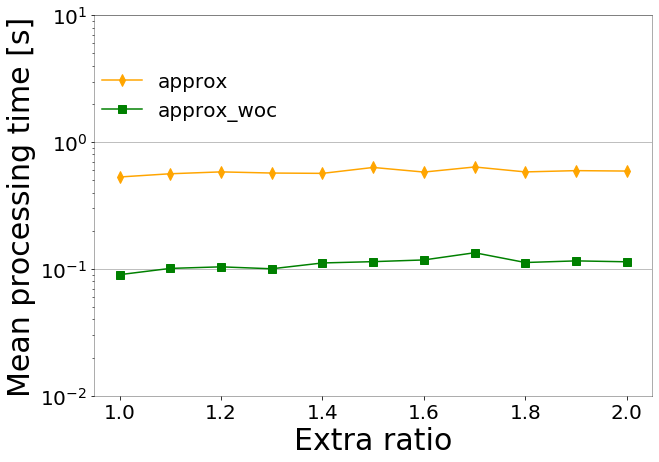

In [10]:
plot_proc_time(
    df_time, 
    sizes, 
    exp_name, 
    ylim=(10**-2, 10**1), 
    xlabel='Extra ratio',
    legend_loc=(0, 0.7)
)

## Travel cost

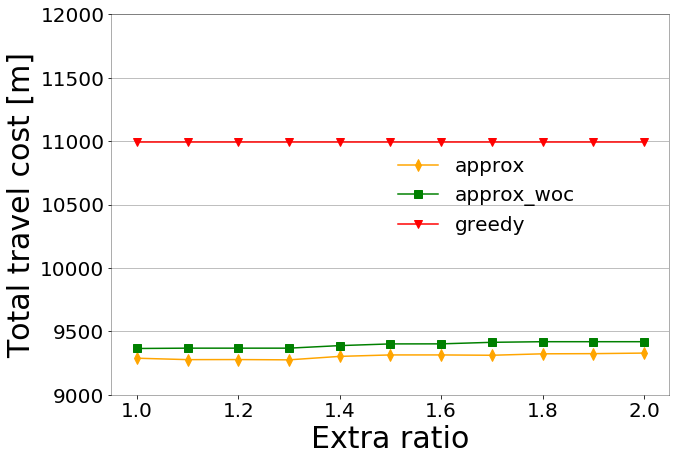

In [11]:
plot_travel_cost(
    df_cost, 
    sizes, 
    exp_name, 
    ylim=(9000,12000), 
    xlabel='Extra ratio',
    legend_loc=(0.5, 0.4)
)

## Ride-sharing efficiency

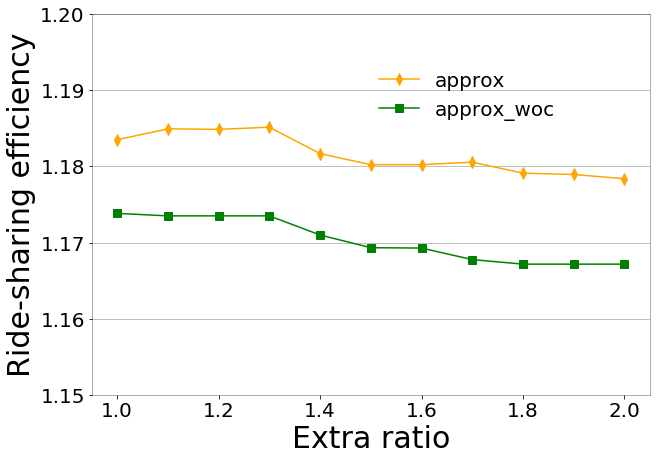

In [12]:
plot_rs_efficiency(
    df_cost, 
    sizes, 
    exp_name, 
    ylim=(1.15,1.2), 
    xlabel='Extra ratio',
    legend_loc=(0.5, 0.7)
)